In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from colorama import Fore, Back, Style # Nice Colors

# Load & Process Image

In [12]:
def loadImage(imgPath):
    img = cv2.imread(imgPath) # 0 Because : We only need 1 color channel(?)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    return thresh    
def removeQZ(img):
    start_row = -1
    start_col = -1
    end_row = -1
    end_col = -1

    for row_index, row in enumerate(img):
        for pixel in row:
            if pixel != 255:
                start_row = row_index
                break
        if start_row != -1:
            break

    for row_index, row in enumerate(img[::-1]):
        for pixel in row:
            if pixel != 255:
                end_row = img.shape[0] - row_index
                break
        if end_row != -1:
            break

    for col_index, col in enumerate(cv2.transpose(img)):
        for pixel in col:
            if pixel != 255:
                start_col = col_index
                break
        if start_col != -1:
            break

    for col_index, col in enumerate(cv2.transpose(img)[::-1]):
        for pixel in col:
            if pixel != 255:
                end_col = img.shape[1] - col_index
                break
        if end_col != -1:
            break
    qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
    return qr_no_quiet_zone

# Stuff

In [13]:
imgPath = '../TC/3.png'

threshimg = loadImage(imgPath)

imgray = cv2.imread(imgPath) 



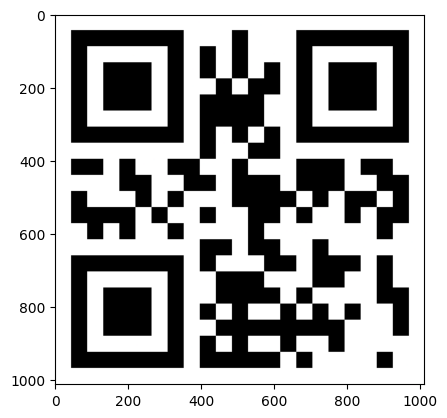

In [14]:
contours,heirarchy = cv2.findContours(threshimg,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(imgray,cmap='gray')

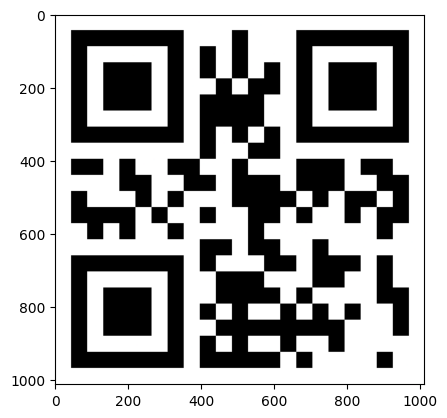

In [15]:
plt.imshow(imgray)

In [16]:
def filterContours(contours):
    img_width  = 1012
    img_height = 1012
    potential_boxes = ([])
    for contour in contours:
        x,y,w,h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h
        if abs(aspect_ratio - 1) > 0.2: # Aspect ratio should be close to 1 if it is a square-like or rectangular shape
            continue # Not what we are looking for.
        min_size = min(w, h)
        if min_size < 0.1 * img_width:  # Img_width [Should] be the same for all images.          
            continue                    
                                        # If the Rectangle is TOO small -> It is not the locator box.
                                        # Probably doesn't need to be a % of the image. ( Could just use some number )

        center_x, center_y = (x + x + w) // 2, (y + y + h) // 2
        image_center_x, image_center_y = img_width // 2, img_height // 2

        # Check for top-left, top-right, or bottom-left corner based on relative position
        is_top_left = center_x < image_center_x * 0.4 and center_y < image_center_y * 0.4
        is_top_right = center_x > image_center_x * 1.6 and center_y < image_center_y * 0.4
        is_bottom_left = center_x < image_center_x * 0.4 and center_y > image_center_y * 1.6


        if not (is_top_left or is_top_right or is_bottom_left): # Wrong Place.
            continue

        # Potential locator box based on heuristics
        potential_boxes.append(contour)

    if len(potential_boxes) == 9:
        print(Fore.GREEN + 'Passed!')
        return True
    print(Fore.RED + 'Failed.')
    print(Fore.YELLOW + 'Potential Boxes Found : '+ str(len(potential_boxes)))
    return False

In [17]:
filterContours(contours)

Passed!


True

# Debugging Purposes

In [18]:
def ContoursFound(contours):
    img_width  = 1012
    img_height = 1012
    potential_boxes = ([])
    for contour in contours:
        x,y,w,h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h
        if abs(aspect_ratio - 1) > 0.2: # Aspect ratio should be close to 1 if it is a square-like or rectangular shape
            continue # Not what we are looking for.
        min_size = min(w, h)
        if min_size < 0.1 * img_width:  # Img_width [Should] be the same for all images.          
            continue                    
                                        # If the Rectangle is TOO small -> It is not the locator box.
                                        # Probably doesn't need to be a % of the image. ( Could just use some number )

        center_x, center_y = (x + x + w) // 2, (y + y + h) // 2
        image_center_x, image_center_y = img_width // 2, img_height // 2

        # Check for top-left, top-right, or bottom-left corner based on relative position
        is_top_left = center_x < image_center_x * 0.4 and center_y < image_center_y * 0.4
        is_top_right = center_x > image_center_x * 1.6 and center_y < image_center_y * 0.4
        is_bottom_left = center_x < image_center_x * 0.4 and center_y > image_center_y * 1.6


        if not (is_top_left or is_top_right or is_bottom_left): # Wrong Place.
            continue

        # Potential locator box based on heuristics
        potential_boxes.append(contour)
    return potential_boxes

   

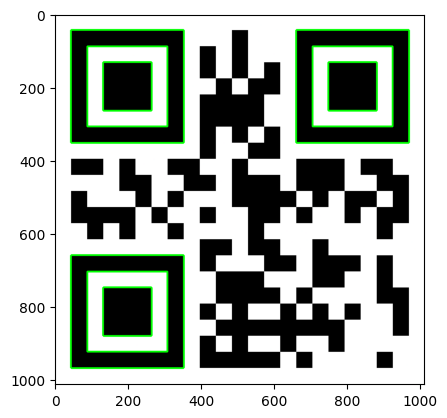

In [19]:
test = ContoursFound(contours)
# Draw the Result Boxes
for i in range(len(test)):
    cv2.drawContours(imgray,test,i,(0,255,0),4)
    i = i + 1
plt.imshow(imgray)

In [20]:
#x,y,w,h = cv2.boundingRect(test[6])
#rect = cv2.minAreaRect(test[6])
#print('The x Co-ordinate of top left is : ' + str(x))
#print('The y Co-ordinate of top left is : ' + str(y))
#print('The x Co-ordinate of bottom right is : ' + str(w))
#print('The y Co-ordinate of bottom right is : ' + str(h))
#aspect_raio = float(w) / h
#print('The aspect ratio is ' + str(aspect_raio))